<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RegresionLogisticaS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
datos = pd.read_csv("winequalityN.csv")

In [40]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [41]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<Axes: xlabel='quality', ylabel='count'>

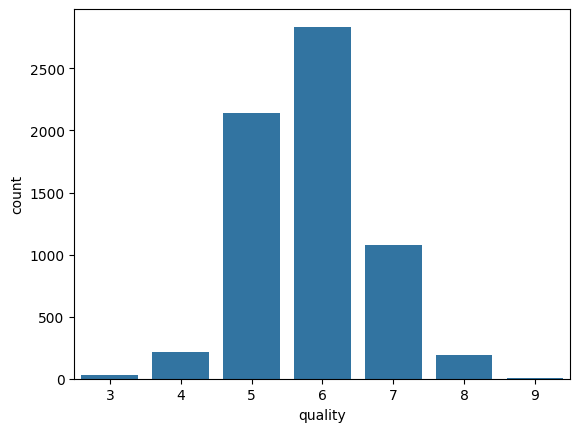

In [42]:
import seaborn as sb
sb.countplot(x="quality", data=datos)

<Axes: xlabel='quality', ylabel='count'>

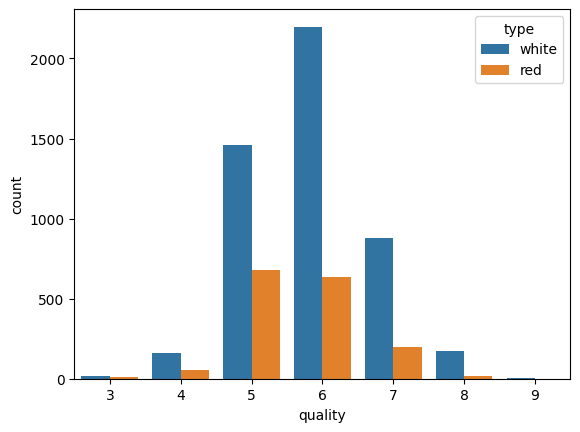

In [43]:
sb.countplot(x="quality", data=datos, hue="type")

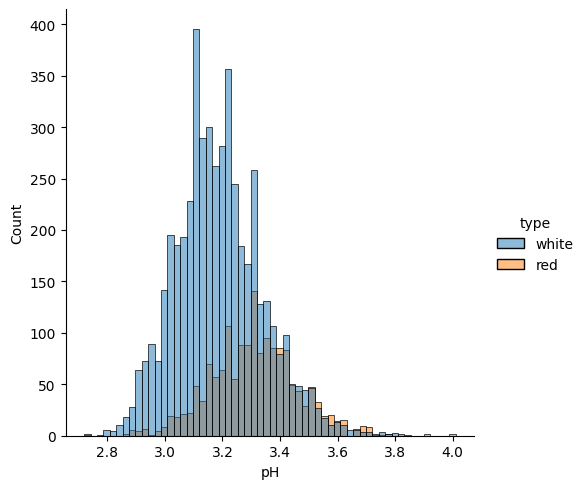

In [44]:
sb.displot(x="pH", data=datos, hue="type")

In [45]:
datos.isna()
#Para ver si hay datos vacios

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
datos.isna().sum()
#conteo de datos vacios

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [47]:
datos = datos.dropna()
#para quitar los que no tienen datos

In [48]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
datos.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<ipython-input-16-4301f4327c1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")


<Axes: >

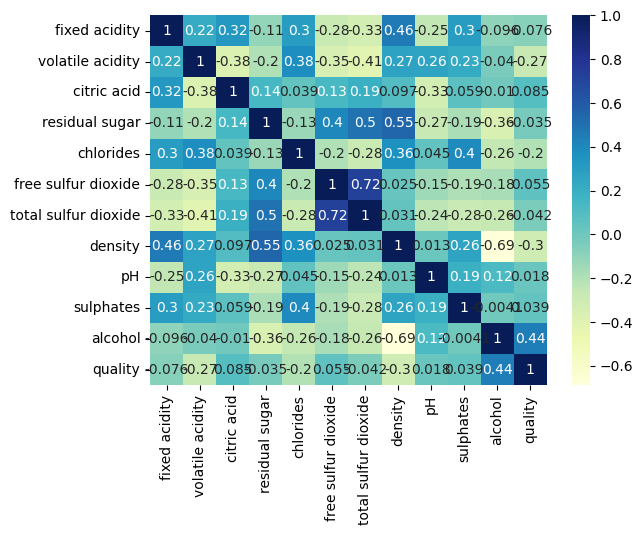

In [16]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [54]:
dummies_type = pd.get_dummies(datos["type"], drop_first=True)


In [57]:
datos = datos.join(dummies_type)

In [59]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [60]:
datos = datos.drop(["type"], axis=1)

In [61]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<Axes: >

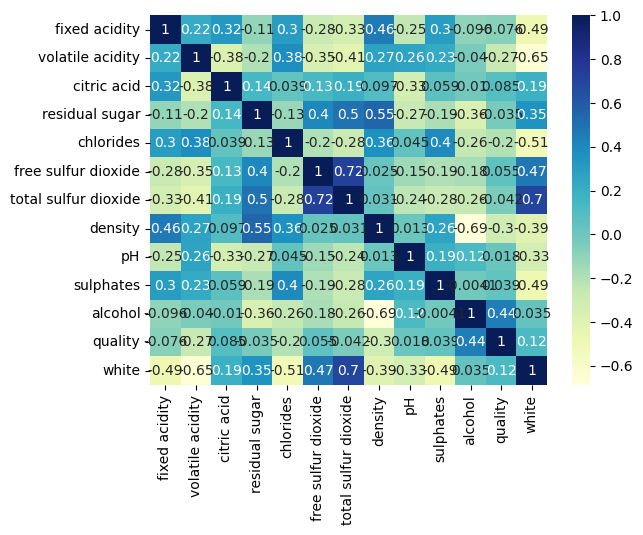

In [62]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [63]:
datos.rename(columns={'white': 'Vino'}, inplace=True)

In [64]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Vino
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<Axes: >

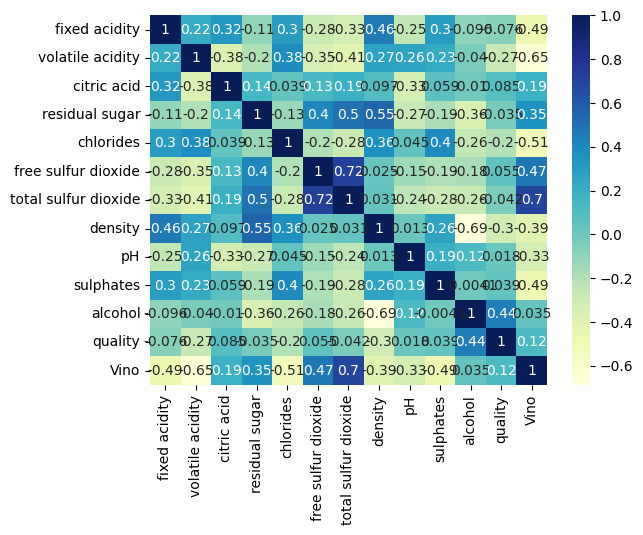

In [65]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [67]:
X = datos.drop(["Vino"], axis=1)
y = datos["Vino"]

In [68]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [74]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_ent, y_ent)
#modificar max de iteraciones ¿Aumentar?

LogisticRegression(max_iter=10000)

In [75]:
predicciones = modelo.predict(X_pru)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.9837587006960556

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       309
           1       0.99      0.99      0.99       984

    accuracy                           0.98      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.98      0.98      0.98      1293



In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[297,  12],
       [  9, 975]])

In [80]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index= ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,297,12
Real: Si,9,975


In [81]:
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [82]:
VinoX = [7.0, 0.27, 0.38, 15, 0.05, 20, 150, 1, 3.1, .45, 8.7, 6]

In [84]:
prediccion = modelo.predict([VinoX])
if prediccion[0] == 1:
  print("Blanco")
else:
  print("Rojo")

Blanco


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
